# Homework 3
### CSE 802
### David Rackerby

1. Consider a two-category (ω1 and ω2) classification problem with equal priors. Each feature is a two- dimensional vector x = (x1, x2)t . The class-conditional densities are:
p(x|ω1) ∼ N(μ1 = (0,0)t , Σ1 = 2I),
p(x|ω2) ∼ N(μ2 = (3,3)t , Σ2 = I).

(a) [7 points] Derive the Bayes decision rule and the Bayes decision boundary. The Bayes decision rule must be written in terms of the Bayes decision boundary.


Start with the minimum-error-rate classification:
$g_i(\textbf{x})$ = ln $p(\textbf{x}|\omega_i) +$ ln$P(\omega_i)$

With equal priors, this reduces to $g_i(\textbf{x})$ = ln $p(\textbf{x}|\omega_i)$
Then expand using the formula for MVG:
$g_i(\textbf{x}) = -\frac{1}{2}(\textbf{x}-\textbf{\mu}_i)^t\Sigma_i^{-1}(\textbf{x}-\textbf{\mu}_i) - \frac{d}{2}$ln$2\pi - \frac{1}{2}|\Sigma_i|$

Which we further reduce to remove additive constants: $g_i(\textbf{x}) = -\frac{1}{2}(\textbf{x}-\textbf{\mu}_i)^t\Sigma_i^{-1}(\textbf{x}-\textbf{\mu}_i)-\frac{1}{2}|\Sigma_i|$

Then plug-in the MVG parameters for each class:
$g_1(\textbf{x}) = -\frac{1}{2}\textbf{x}^t\begin{bmatrix}\frac{1}{2} & 0 \\ 0 & \frac{1}{2} \end{bmatrix}\textbf{x} - 2 = -\frac{1}{2}\textbf{x}^t \frac{1}{2}I\textbf{x} - 2 = -\frac{1}{4}\textbf{x}^t\textbf{x} - 2 = -\frac{1}{4}(x_1^2 + x_2^2) - 2$

$g_2(\textbf{x}) = -\frac{1}{2}\begin{pmatrix} x_1 - 3 \\ x_2 - 3 \end{pmatrix}^t I \begin{pmatrix} x_1 - 3 \\ x_2 - 3 \end{pmatrix} - \frac{1}{2} = -\frac{1}{2}((x_1 - 3)^2 + (x_2 - 3)^2) - \frac{1}{2} = -\frac{1}{2}x_1^2 - \frac{1}{2}x_2^2 + 3x_1 + 3x_2 - \frac{19}{2}$

Set the discriminant functions equal to each other to derive the decision boundary:
$g_1(\textbf{x}) = g_2(\textbf{x})$

$\implies -\frac{1}{4}(x_1^2 + x_2^2) - 2 = -\frac{1}{2}x_1^2 - \frac{1}{2}x_2^2 + 3x_1 + 3x_2 - \frac{19}{2}$

$\implies \frac{1}{4}x_1^2 + \frac{1}{4}x_2^2 - 3x_1 - 3x_2 + \frac{15}{2} = 0$

$\implies x_1^2 + x_2^2 - 12x_1 - 12x_2 + 30 = 0$

$\implies x_1^2 + x_2^2 - 12x_1 - 12x_2 + 72 = 42$

$\implies (x_1 - 6)^2 + (x_2 - 6)^2 = 42$

The decision boundary is a circle centered at (6, 6) with a radius of $\sqrt{42}$. The decision rule is the following: assign $\textbf{x}$ to class $\omega_1$ if $(x_1 - 6)^2 + (x_2 - 6)^2$ is greater than 42 (outside the circle); otherwise, assign $\textbf{x}$ to $\omega_2$

(b) [10 points] What are the theoretical Bhattacharyya and Chernoff bounds on the probability of misclassification, P(error)?

Begin with the formula for the Chernoff Bound:
$P(error) \leq P^\beta(\omega_1)P^{1-\beta}(\omega_2)\int p^\beta(\textbf{x}|\omega_1)p^{1-\beta}(\textbf{x}|\omega_2)d\textbf{x}$ for $0 \leq \beta \leq 1.$
Since priors are equal, $P^\beta(\omega_1)P^{1-\beta}(\omega_2) = 0.5$.
Since the likelihoods are both multivariate gaussian, $\int p^\beta(\textbf{x}|\omega_1)p^{1-\beta}(\textbf{x}|\omega_2)d\textbf{x} = e^{-k(\beta)}$ where

$$k(\beta) = \frac{\beta(1-\beta)}{2}(\textbf{\mu}_2 - \textbf{\mu}_1)^t [\beta\Sigma_1 + (1-\beta)\Sigma_2]^{-1}(\textbf{\mu}_2 - \textbf{\mu}_1) + \frac{1}{2}$ln$\frac{|\beta\Sigma_1 + (1-\beta)\Sigma_2|}{|\Sigma_1|^\beta |\Sigma_2|^{1-\beta}$$

Now we plug-in the means and variances for both classes and simplify:

$$k(\beta) = \frac{\beta(1-\beta)}{2}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t [2\beta I + (1-\beta) I]^{-1} \begin{pmatrix} 3 \\ 3 \end{pmatrix} + \frac{1}{2}ln\frac{|2 \beta I + (1-\beta)I|}{|2I|^{\beta}|I|^{1-\beta}$$


$$= \frac{\beta(1-\beta)}{2}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t [(1+\beta)I]^{-1} \begin{pmatrix} 3 \\ 3 \end{pmatrix} + \frac{1}{2}ln\frac{|(1+\beta)I|}{|2I|^{\beta}|I|^{1-\beta}$$


$$= \frac{\beta(1-\beta)}{2}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t \frac{1}{1+\beta}I \begin{pmatrix} 3 \\ 3 \end{pmatrix} + \frac{1}{2}ln\frac{(1+\beta)^2}{4^{\beta}$$


$$= \frac{\beta(1-\beta)}{2(1+\beta)}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t I \begin{pmatrix} 3 \\ 3 \end{pmatrix} + ln(1+\beta) - \frac{\beta}{2}ln(4)$$

$$= \frac{9\beta(1-\beta)}{1+\beta} + ln(1+\beta) - \frac{\beta}{2}ln(4)$$

Now that everything is in terms of $\beta$, we derive $e^{-k(\beta)}$ with respect to $\beta$ and find the local minimum by setting $\beta = 0$ and finding the solution in the range [0, 1]:
$\frac{d}{d\beta}e^{-k(\beta)} = 0$ when $\beta = 0.41527$

Thus, the theoretical Chernoff bound on the error is $P(error) \leq 0.5 \cdot e^{-k(0.41527)} = 0.100585$.

To calculate the Bhattacharyya bound, we set $\beta = 0.5$ and take the output: $P(error) \leq 0.5 \cdot e^{-k(0.5)} = 0.10518$


(c) [3 points] Now generate 10,000 bivariate random patterns from each of the two densities (if you are using matlab, then the mvnrnd function can be used to generate these patterns). Plot these patterns in a graph using different markers to distinguish the two classes. On the same graph, plot the Bayes decision boundary derived earlier.

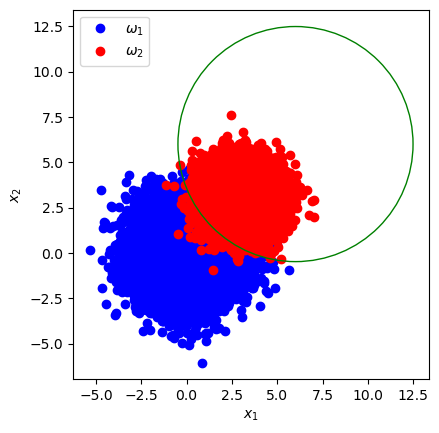

In [27]:
import numpy as np
import matplotlib.pyplot as plt

mean_1 = np.array([0, 0])
mean_2 = np.array([3, 3])

cov_1 = 2*np.identity(2)
cov_2 = np.identity(2)

class_1_sample = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=10_000)
class_2_sample = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=10_000)

plt.plot(class_1_sample[:,0], class_1_sample[:,1], 'bo', label=r'$\omega_1$')
plt.plot(class_2_sample[:,0], class_2_sample[:,1], 'ro', label=r'$\omega_2$')
circle = plt.Circle(xy=(6, 6), radius=(42**0.5), color='g', fill=False, zorder=2)
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()
